# Monitor any Llama Index RAG pipeline with Literal AI

Let's build a typical Q&A application with LLamaIndex and monitor it with Literal AI. 

We start off with the [Q&A example by LlamaIndex](https://docs.llamaindex.ai/en/stable/understanding/putting_it_all_together/q_and_a/)

- [Set up monitoring](#setup)
- [Q&A example from LlamaIndex](#llama-index-docs)
- [Build a Thread application](#build-thread-app)
- [Explore Threads](#explore-threads)

<a id="setup"></a>
## Set up monitoring

We start by instantiating a Literal client and setting a callback manager in our LLamaIndex settings.  
This sets up monitoring on LlamaIndex APIs.

In [2]:
import os
from dotenv import load_dotenv

from literalai import LiteralClient

# Copy the .env.example to a .env to load environment variables.
# To get a Literal API key, check https://docs.getliteral.ai/get-started/installation#how-to-get-my-api-key
load_dotenv()

literalai_client = LiteralClient()

# Instrument LlamaIndex with the client
literalai_client.instrument_llamaindex()


<a id="llama-index-docs"></a>
## Create Llama index from documents

We can then load documents from a `docs` directory (create it!) and create a LlamaIndex query engine.

In [3]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

documents = SimpleDirectoryReader("docs").load_data()
index = VectorStoreIndex.from_documents(documents)

query_engine = index.as_query_engine()

<a id="build-thread-app"></a>
## Build a Thread application

Finally, we build a simple Q&A application which we wrap in Literal threads.

In [4]:
@literalai_client.thread(name="Q&A Thread")
def rag_thread(query):
    return query_engine.query(query)


In [5]:
rag_thread("What's Literal?").response

'Literal is a software package or library that is specified in the requirements.txt file.'

<a id="explore-threads"></a>
## Explore Threads

All calls to `rag_thread` above will be wrapped in a Thread and you can browse them all from the "Observability" > "Threads" table:

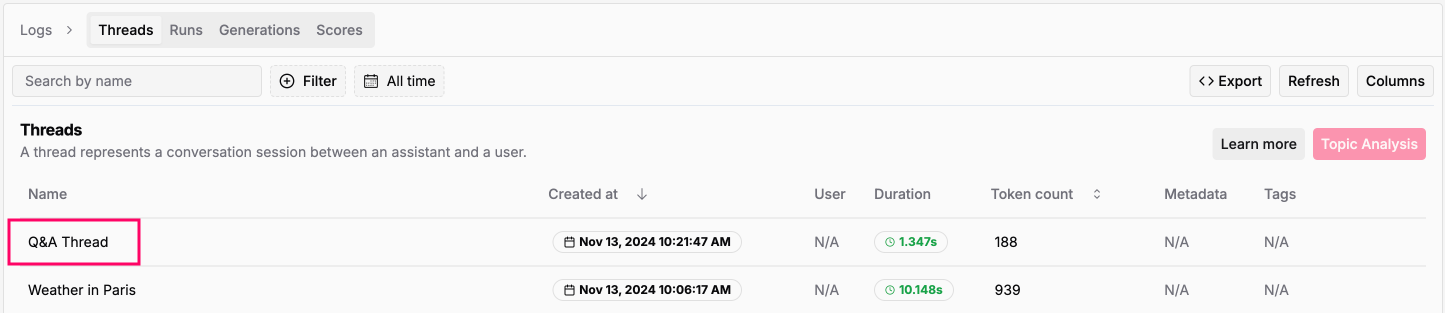



Clicking on a specific Thread, we can explore the inner workings of LlamaIndex and the steps involved to generate the response:

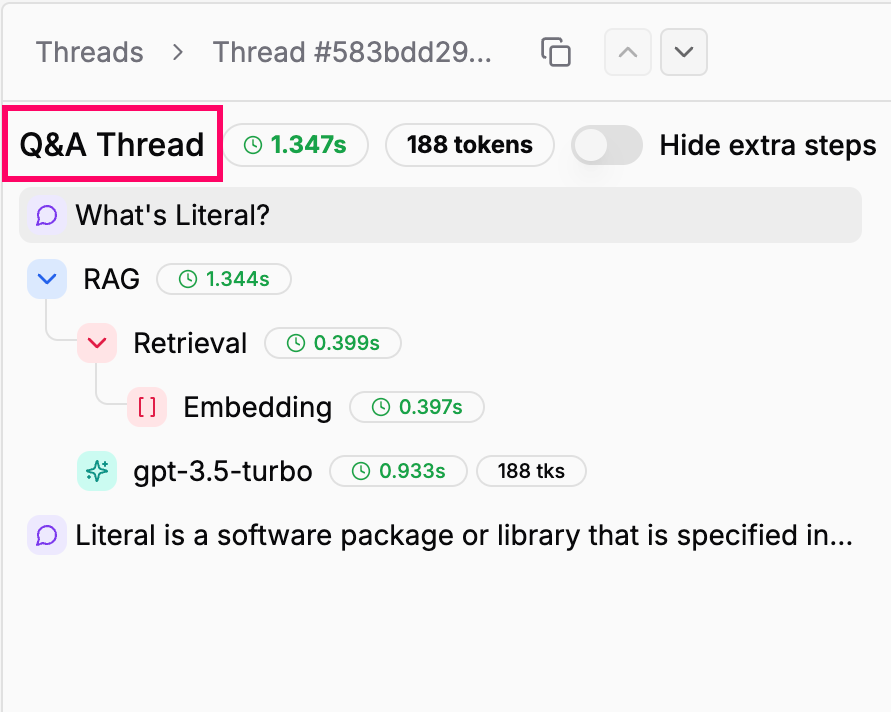
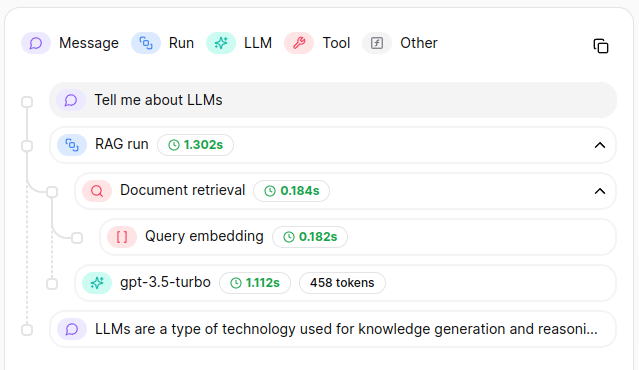